In [58]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd
from glucose_eval import AnalyteLabError

In [59]:
df_130_0 = pd.read_csv('data/filtered_130_0.csv')
df_130_1 = pd.read_csv('data/filtered_130_1.csv')
df_130_2 = pd.read_csv('data/filtered_130_2.csv')

df_131_0 = pd.read_csv('data/filtered_131_0.csv')
df_131_1 = pd.read_csv('data/filtered_131_1.csv')
df_131_2 = pd.read_csv('data/filtered_131_2.csv')

df_149_0 = pd.read_csv('data/filtered_149_0.csv')
df_149_1 = pd.read_csv('data/filtered_149_1.csv')
df_149_2 = pd.read_csv('data/filtered_149_2.csv')

In [60]:
#doses per patient
patient_doses_130 = (50, 18)  # mg of glucose, u of insulin

patient_doses_131_0 = (50, 4.05)  # mg of glucose, u of insulin
patient_doses_131_1 = (50, 5.5)  # mg of glucose, u of insulin
patient_doses_131_2 = (50, 3.33)  # mg of glucose, u of insulin
patient_doses_131_avg = (50, 4.3)

patient_doses_149_0 = (50, 4.32)  # mg of glucose, u of insulin
patient_doses_149_1 = (50, 8)  # mg of glucose, u of insulin
patient_doses_149_2 = (50, 6.25)  # mg of glucose, u of insulin
patient_doses_149_avg = (50, 6.19)

In [61]:
glucose_vals_130_0 = df_130_0['GLU'].dropna()
time_at_glucose_130_0 = df_130_0['Time'][glucose_vals_130_0.index]
new_df_130_0 = pd.DataFrame({'Time': time_at_glucose_130_0, 'GLU': glucose_vals_130_0})
new_df_130_0 = new_df_130_0.reset_index(drop=True)
glucose_vals_130_1 = df_130_1['GLU'].dropna()
time_at_glucose_130_1 = df_130_1['Time'][glucose_vals_130_1.index]
new_df_130_1 = pd.DataFrame({'Time': time_at_glucose_130_1, 'GLU': glucose_vals_130_1})
new_df_130_1 = new_df_130_1.reset_index(drop=True)
glucose_vals_130_2 = df_130_2['GLU'].dropna()
time_at_glucose_130_2 = df_130_2['Time'][glucose_vals_130_2.index]
new_df_130_2 = pd.DataFrame({'Time': time_at_glucose_130_2, 'GLU': glucose_vals_130_2})
new_df_130_2 = new_df_130_2.reset_index(drop=True)

glucose_vals_131_0 = df_131_0['GLU'].dropna()
time_at_glucose_131_0 = df_131_0['Time'][glucose_vals_131_0.index]
new_df_131_0 = pd.DataFrame({'Time': time_at_glucose_131_0, 'GLU': glucose_vals_131_0})
new_df_131_0 = new_df_131_0.reset_index(drop=True)
glucose_vals_131_1 = df_131_1['GLU'].dropna()
time_at_glucose_131_1 = df_131_1['Time'][glucose_vals_131_1.index]
new_df_131_1 = pd.DataFrame({'Time': time_at_glucose_131_1, 'GLU': glucose_vals_131_1})
new_df_131_1 = new_df_131_1.reset_index(drop=True)
glucose_vals_131_2 = df_131_2['GLU'].dropna()
time_at_glucose_131_2 = df_131_2['Time'][glucose_vals_131_2.index]
new_df_131_2 = pd.DataFrame({'Time': time_at_glucose_131_2, 'GLU': glucose_vals_131_2})
new_df_131_2 = new_df_131_2.reset_index(drop=True)

glucose_vals_149_0 = df_149_0['GLU'].dropna()
time_at_glucose_149_0 = df_149_0['Time'][glucose_vals_149_0.index]
new_df_149_0 = pd.DataFrame({'Time': time_at_glucose_149_0, 'GLU': glucose_vals_149_0})
new_df_149_0 = new_df_149_0.reset_index(drop=True)
glucose_vals_149_1 = df_149_1['GLU'].dropna()
time_at_glucose_149_1 = df_149_1['Time'][glucose_vals_149_1.index]
new_df_149_1 = pd.DataFrame({'Time': time_at_glucose_149_1, 'GLU': glucose_vals_149_1})
new_df_149_1 = new_df_149_1.reset_index(drop=True)
glucose_vals_149_2 = df_149_2['GLU'].dropna()
time_at_glucose_149_2 = df_149_2['Time'][glucose_vals_149_2.index]
new_df_149_2 = pd.DataFrame({'Time': time_at_glucose_149_2, 'GLU': glucose_vals_149_2})
new_df_149_2 = new_df_149_2.reset_index(drop=True)

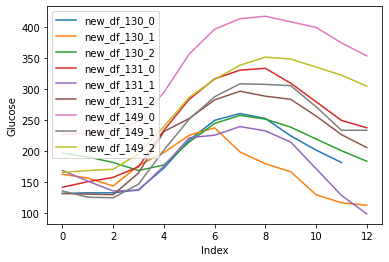

In [62]:
domain_13 = np.arange(0, 13)
domain_12 = np.arange(0, 12)

plt.plot(domain_12, new_df_130_0['GLU'], label='new_df_130_0')
plt.plot(domain_13, new_df_130_1['GLU'], label='new_df_130_1')
plt.plot(domain_13, new_df_130_2['GLU'], label='new_df_130_2')

plt.plot(domain_13, new_df_131_0['GLU'], label='new_df_131_0')
plt.plot(domain_13, new_df_131_1['GLU'], label='new_df_131_1')
plt.plot(domain_13, new_df_131_2['GLU'], label='new_df_131_2')

plt.plot(domain_13, new_df_149_0['GLU'], label='new_df_149_0')
plt.plot(domain_13, new_df_149_1['GLU'], label='new_df_149_1')
plt.plot(domain_13, new_df_149_2['GLU'], label='new_df_149_2')

plt.xlabel('Index')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [63]:
dfs = [new_df_130_1, new_df_130_2, new_df_131_0, new_df_131_1, new_df_131_2,
       new_df_149_0, new_df_149_1, new_df_149_2]

max_indices = [df['GLU'].idxmax() for df in dfs]
max_times = [dfs[i].loc[max_indices[i], 'Time'] for i in range(8)]

max_time = max(max_times)

for i in range(len(dfs)):
    time_offset = max_time - max_times[i]
    dfs[i]['Time'] = dfs[i]['Time'] + time_offset

overall_min_time = min(df['Time'].min() for df in dfs)
overall_max_time = max(df['Time'].max() for df in dfs)

t2 = np.linspace(overall_min_time, overall_max_time, num=100)

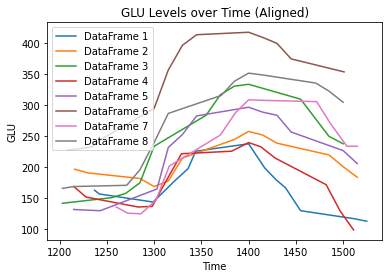

In [64]:
for i, df in enumerate(dfs):
    plt.plot(df['Time'], df['GLU'], label=f'DataFrame {i+1}')

plt.xlabel('Time')
plt.ylabel('GLU')
plt.title('GLU Levels over Time (Aligned)')
plt.legend()
plt.show()

In [65]:
# helper functions and constants

# we define 6 parameters to change the overall function shape
PARAMS = ("$mu$", "a", "b", "c", "k", "z")

# Global variance for priors
Q = 1

def normal(x, mu, sigma, as_log):
    den = (2*np.pi*(sigma**2))**0.5
    exp = - (x - mu)**2 / (2*(sigma**2))
    return exp - np.log(den) if as_log else np.exp(exp) / den

def logistic(x, a=1, b=1, c=2):
    return a / (1 + np.exp(-b * (x - c)))

def f1(t, G=1, mu_0=0, *args, **kwargs):
    return mu_0 + G * logistic(t, *args, **kwargs) 

def f2(t, t1, I=1, k=1, z=0, *args, **kwargs):
    W = f1(t1, *args, **kwargs) - z
    return W, W * np.exp(-I * (t - t1) * k) + z

def f(t, doses, theta, cutoff=None, offset=0):
    i = (len(t) // 2) + offset if cutoff is None else cutoff
    params_f1, params_f2 = theta[:4], theta[4:]
    G, I = doses
    
    glucose = f1(t[:i], G, *params_f1)
    W, insulin = f2(t[i:], t[i], I, *params_f2, G, *params_f1)

    
    return W, np.concatenate((glucose, insulin))

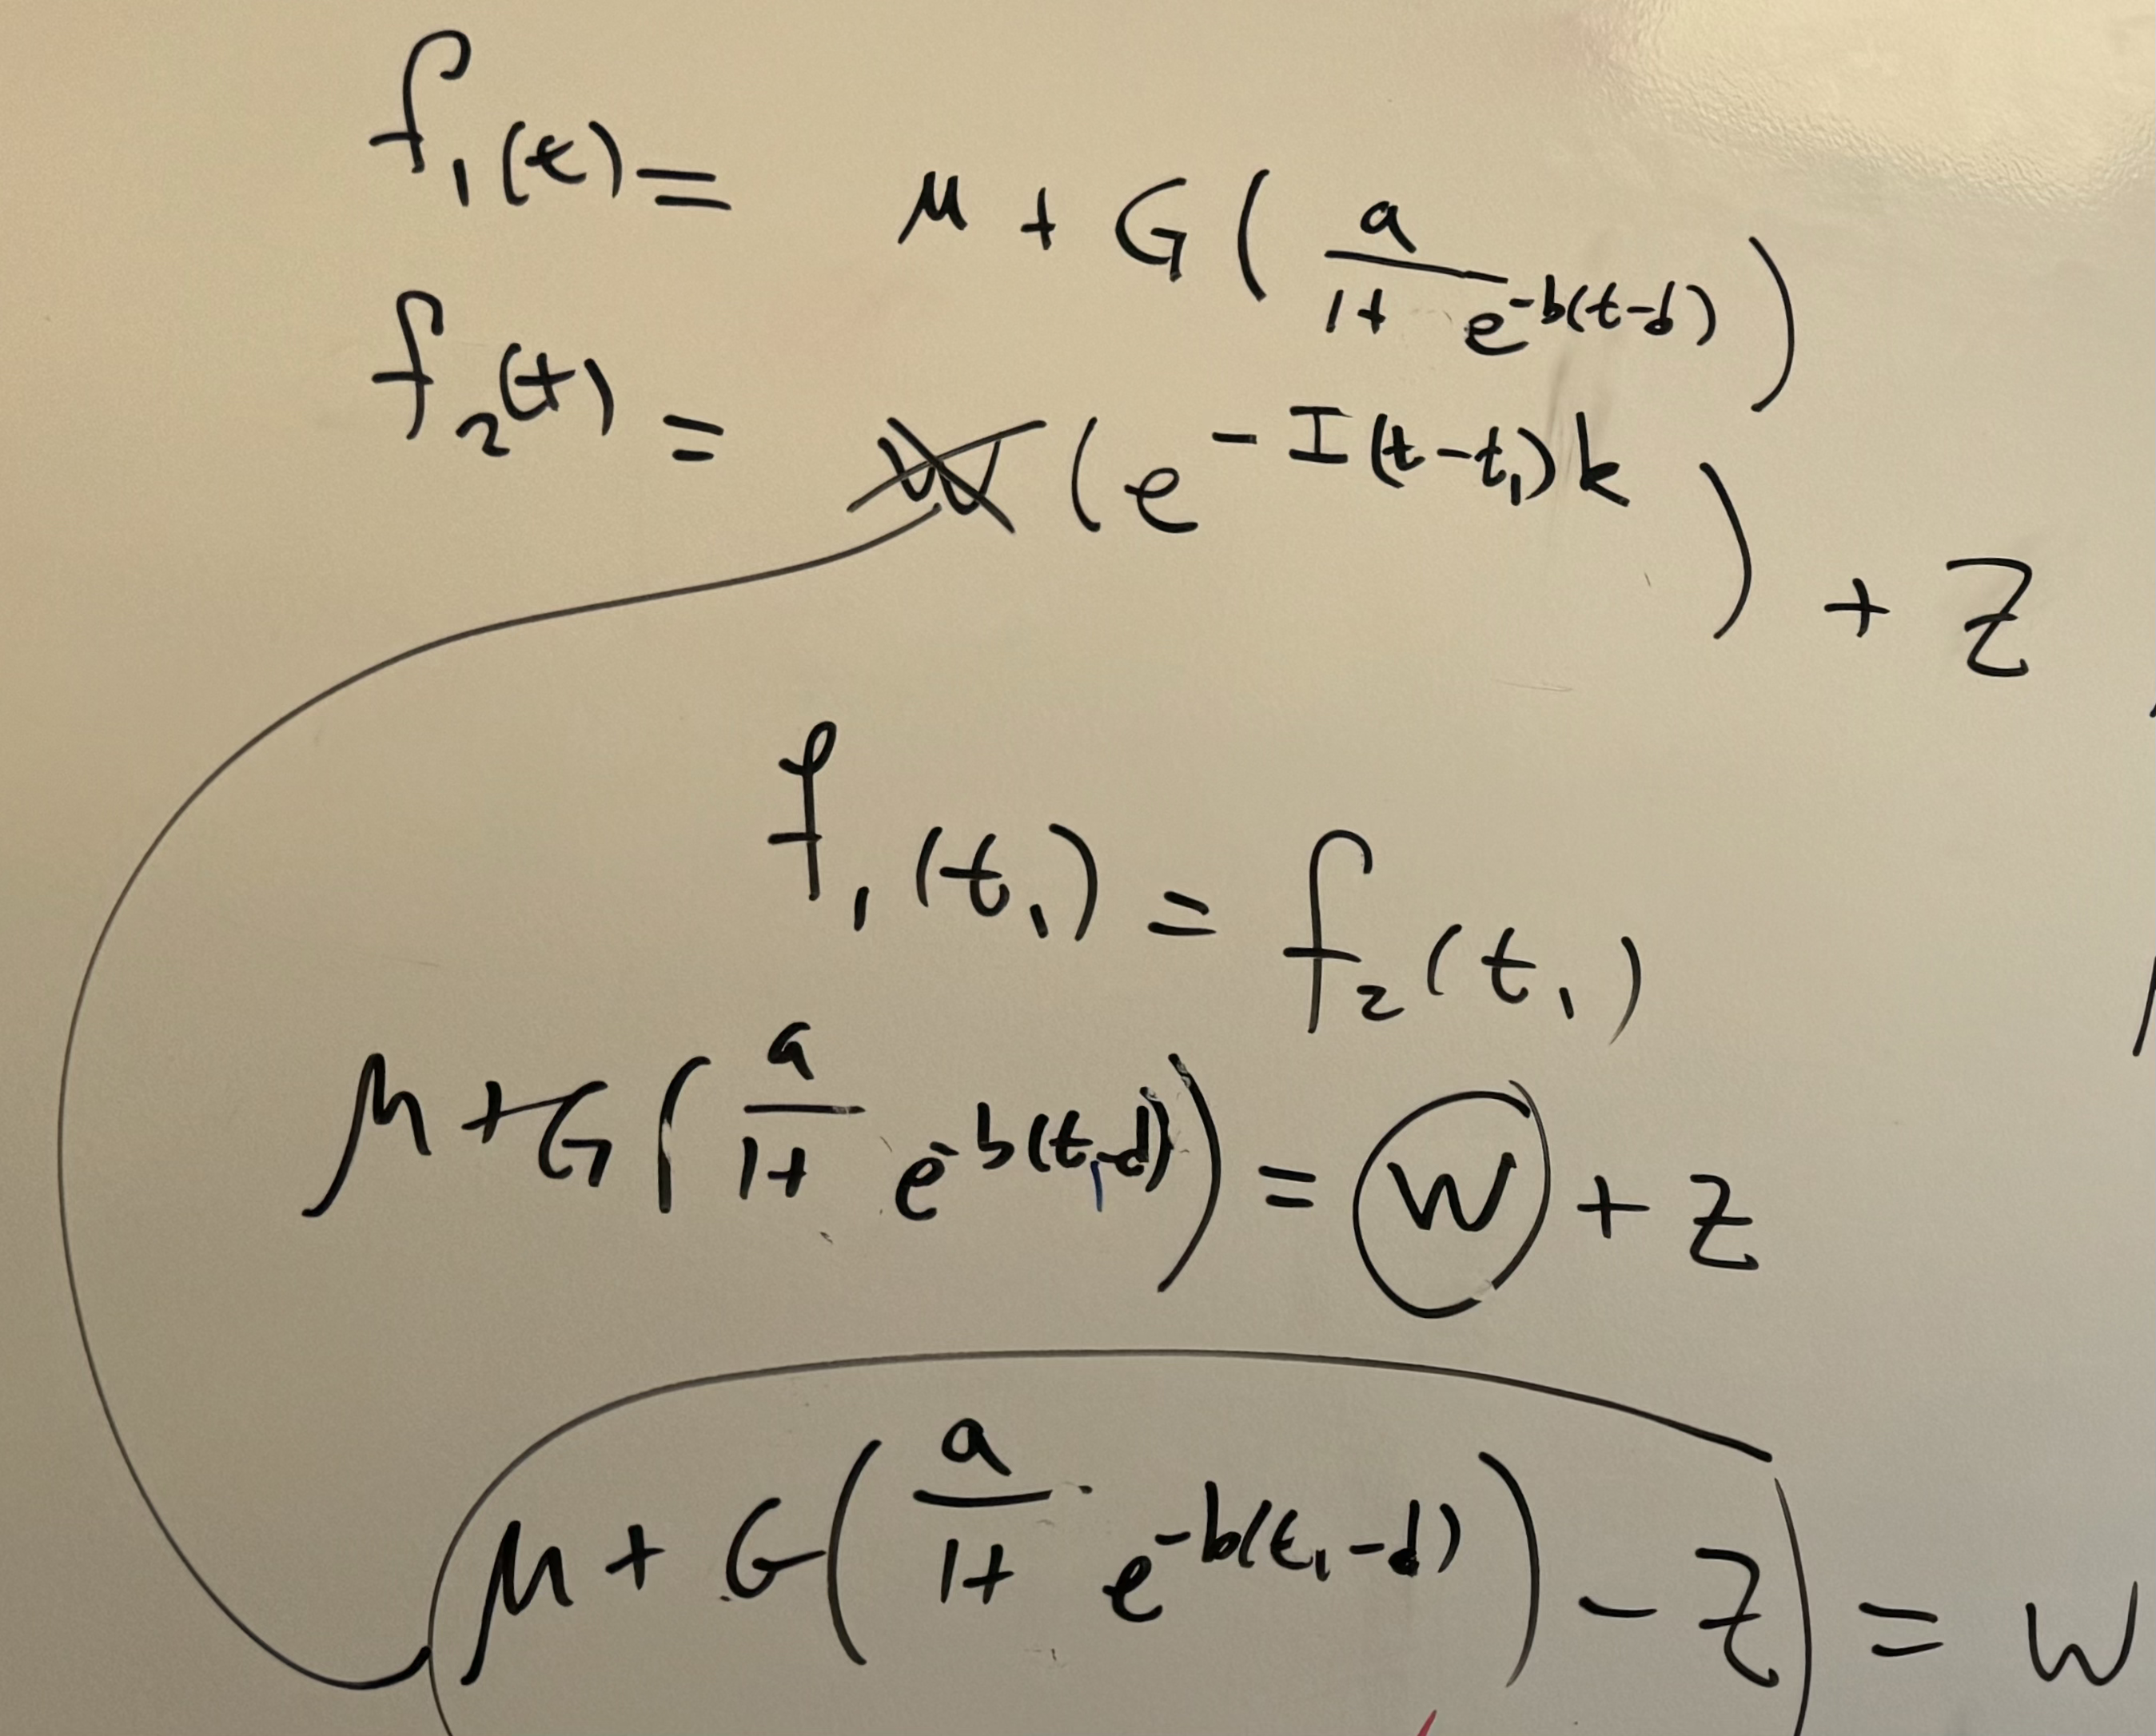

In [88]:
from PIL import Image
from pillow_heif import register_heif_opener

register_heif_opener()

image = Image.open('IMG_0206.heic')
image

In [101]:
def draw_priors(t, doses, t_i):
    
    W = 1
    while W > 0:
        G, I = doses
        mu = np.random.normal(150, 35)
        a = np.abs(np.random.normal((250 - mu) / G, 100 / G))
        b = np.random.gamma((100/3)*(4/(G*a)), scale=1)
        c = np.random.normal((t_i+2) / 2, 0.25)
        mean = (np.log(2) / (I))*2
        scale = 0.2
        k = np.random.gamma(mean/scale, scale=scale)
        mean2 = mu
        scale2 = 0.3
        z = np.random.gamma(mean2/scale2, scale=scale2)
        theta =  [mu, a, b, c, k, z]
        W, _ = f(t, doses, theta, cutoff=None, offset=0)
        return theta

In [11]:
#def draw_priors(t, doses, t_i):
    #W = 1
    #while W > 0:
        #G, I = doses
        #mu = np.abs(np.random.normal(150, 35))
        #a = np.abs(np.random.normal((350 - mu) / G, 100 / G))
        #b = np.random.exponential(2/np.log(2))
        #c = np.random.exponential(t_i/2)
        #k = np.abs(np.random.normal(0.01, 0.01))
        #z = np.abs(np.random.normal(mu, 35))
        #theta =  [mu, a, b, c, k, z]
        #W, _ = f(t, doses, theta, cutoff=None, offset=0)
        #return theta

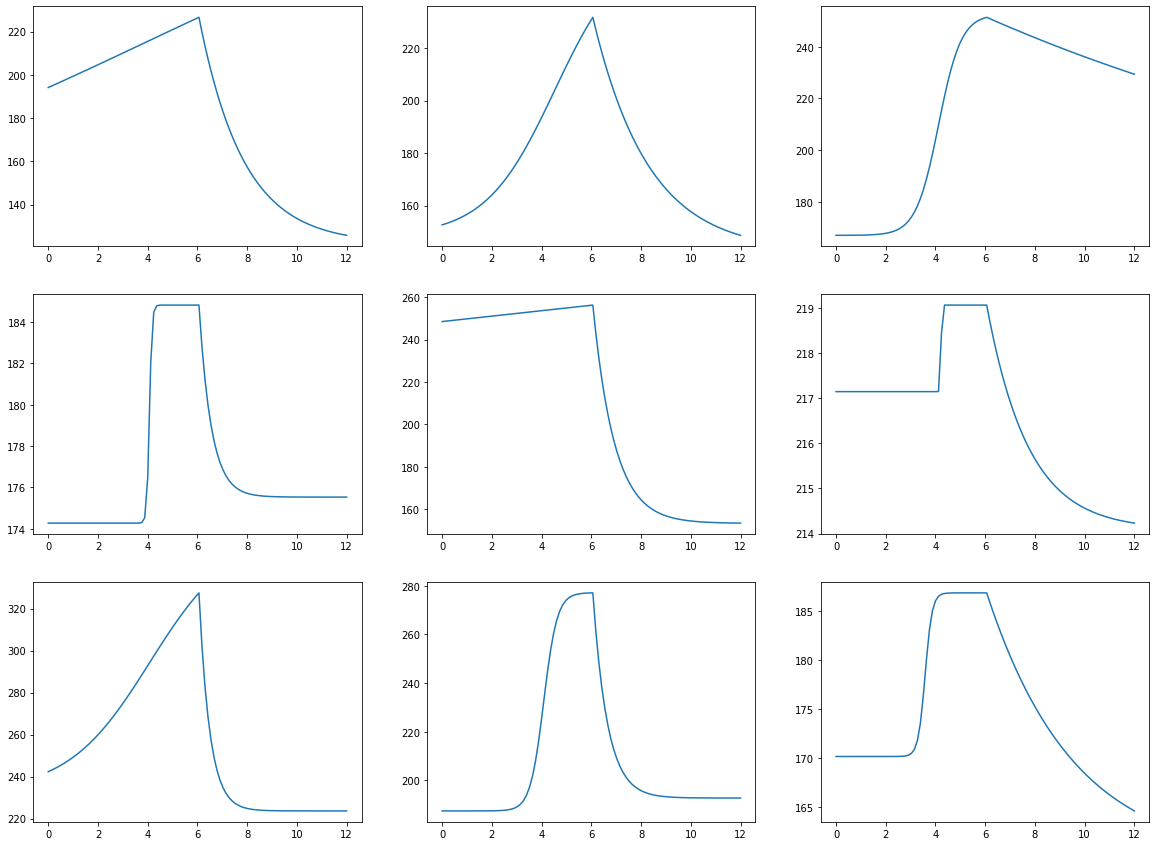

In [67]:
t_i = 6
t = np.linspace(0,12,100)
p130_doses = (50, 18)
p131_doses = (50, 4.3)
p149_doses = (50, 6.19)

W, y1 = f(t, p130_doses, draw_priors(t, p130_doses, 6))
W, y2 = f(t, p130_doses, draw_priors(t, p130_doses, 6))
W, y3 = f(t, p130_doses, draw_priors(t, p130_doses, 6))

W, y4 = f(t, p131_doses, draw_priors(t, p131_doses, 6))
W, y5 = f(t, p131_doses, draw_priors(t, p131_doses, 6))
W, y6 = f(t, p131_doses, draw_priors(t, p131_doses, 6))

W, y7 = f(t, p149_doses, draw_priors(t, p149_doses, 6))
W, y8 = f(t, p149_doses, draw_priors(t, p149_doses, 6))
W, y9 = f(t, p149_doses, draw_priors(t, p149_doses, 6))


_, ax = plt.subplots(3, 3, figsize=(20, 15))
ax[0][0].plot(t, y1)
ax[0][1].plot(t, y2)
ax[0][2].plot(t, y3)

ax[1][0].plot(t, y4)
ax[1][1].plot(t, y5)
ax[1][2].plot(t, y6)

ax[2][0].plot(t, y7)
ax[2][1].plot(t, y8)
ax[2][2].plot(t, y9)
plt.show()

/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_76021/2827632892.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_76021/2827632892.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))


Text(0.5, 1.0, 'Patient 130')

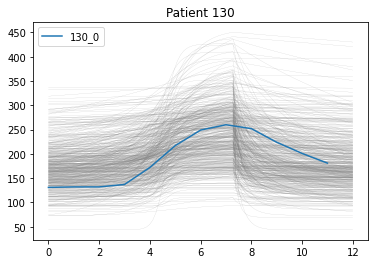

In [102]:
# different curves for different sets of params [f_0, a, b, c, k, z], with a, b, c, z as shape params
t_i=6

for i in range(500):
    params130 = draw_priors(t, p130_doses, 7)
    W, yy = f(t, p130_doses, params130, offset=10)
    plt.plot(t, yy, color='gray', linewidth=0.1, alpha=0.9)

plt.plot(domain_12, new_df_130_0['GLU'], label='130_0')
#plt.plot(domain_13, new_df_130_1['GLU'], label='date 2')
#plt.plot(domain_13, new_df_130_2['GLU'], label='date 3', color='orange')
plt.legend()
plt.title('Patient 130')

/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_76021/2827632892.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))


Text(0.5, 1.0, 'Patient 131')

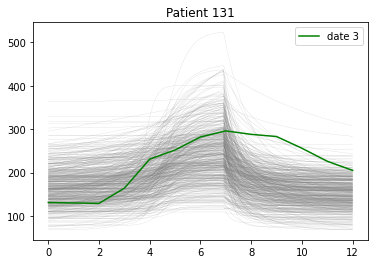

In [57]:
for i in range(500):
    params131 = draw_priors(t, patient_doses_131_2, 7)
    W, yy = f(t, patient_doses_131_2, params131, offset=7)
    plt.plot(t, yy, color='gray', linewidth=0.1, alpha=0.9)

#plt.plot(domain_13, new_df_131_0['GLU'], label='date 1')
#plt.plot(domain_13, new_df_131_1['GLU'], label='date 2', color='orange')
plt.plot(domain_13, new_df_131_2['GLU'], label='date 3', color='green')
plt.legend()
plt.title('Patient 131')

/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_76021/2827632892.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_76021/2827632892.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))


Text(0.5, 1.0, 'Patient 149')

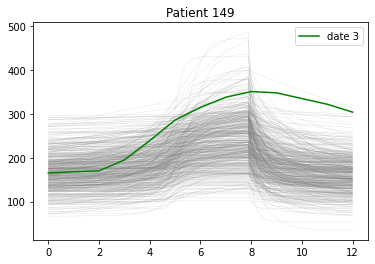

In [79]:
for i in range(500):
    params149 = draw_priors(t, patient_doses_149_2, 8)
    W, yy3 = f(t, patient_doses_149_2, params149, offset=15)
    plt.plot(t, yy3, color='gray', linewidth=0.1, alpha=0.9)

#plt.plot(domain_13, new_df_149_0['GLU'], label='date 1')
#plt.plot(domain_13, new_df_149_1['GLU'], label='date 2', color='orange')
plt.plot(domain_13, new_df_149_2['GLU'], label='date 3', color='green')
plt.legend()
plt.title('Patient 149')

/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var/folders/qs/mhsggvld4t1b9dry5p0xdg980000gn/T/ipykernel_3539/2073151092.py:15: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))
/var

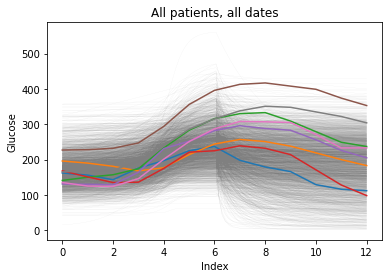

In [201]:
for i in range(1000):
    params130 = draw_priors(t, p130_doses, t_i)
    params131 = draw_priors(t, p131_doses, t_i)
    params149 = draw_priors(t, p149_doses, t_i)
    plt.plot(t, f(t, p130_doses, params130), color='gray', linewidth=0.1, alpha=0.3)
    plt.plot(t, f(t, p131_doses, params131), color='gray', linewidth=0.1, alpha=0.3)
    plt.plot(t, f(t, p149_doses, params149), color='gray', linewidth=0.1, alpha=0.3)

#plt.plot(domain_12, new_df_130_0['GLU'], label='new_df_130_0')
plt.plot(domain_13, new_df_130_1['GLU'])
plt.plot(domain_13, new_df_130_2['GLU'])

plt.plot(domain_13, new_df_131_0['GLU'])
plt.plot(domain_13, new_df_131_1['GLU'])
plt.plot(domain_13, new_df_131_2['GLU'])

plt.plot(domain_13, new_df_149_0['GLU'])
plt.plot(domain_13, new_df_149_1['GLU'])
plt.plot(domain_13, new_df_149_2['GLU'])

plt.title('All patients, all dates')

plt.xlabel('Index')
plt.ylabel('Glucose')
plt.show()
    